# SELECT Python
## SQLite w Pythonie
### Jakub Szponder
#### Python Level Up, 29.03.2018

![Logo kursu Python Level Up](https://raw.githubusercontent.com/daftcode/python_levelup_2018/master/logo.png)

![Plan zajęć](https://raw.githubusercontent.com/daftcode/python_levelup_2018/master/plan_zajec.png)

# Baza danych
- zbiór danych zapisanych zgodnie z ustalonymi regułami

# Systemy zarządzania bazą danych (DBMS)
- oprogramowanie służące do tworzenia i zarządzania bazami danych
- sposób trzymania danych jest zależny od konkretnego systemu

# SQL
- język służący do interakcji z __relacyjnymi bazami danych__
- (prawie) wszystkie relacyjne __DBMS__ wykorzystują __SQL__ jako podstawowy język zapytań

- fajny tutorial: https://sqlbolt.com/

# Przykłady relacyjnych systemów zarządzania bazą danych
- PostgreSQL (open source)
- MySQL (open source)
- SQLite (open source)
- Oracle
- Microsoft SQL Server
- IBM DB2
- Microsoft Access

# SQLite
- nie ma prawie żadnych zależności, działa na każdym systemie operacyjnym
- nie ma potrzeby uruchamiać żadnego serwera bazy danych
- nie wymaga żadnej dodatkowej konfiguracji
- najczęście używana baza danych na świecie https://www.sqlite.org/mostdeployed.html
- cała baza danych zapisana jest w jednym pliku (cross-platform)
- obsługuje transakcje

# Jak wygląda SQLowa baza danych
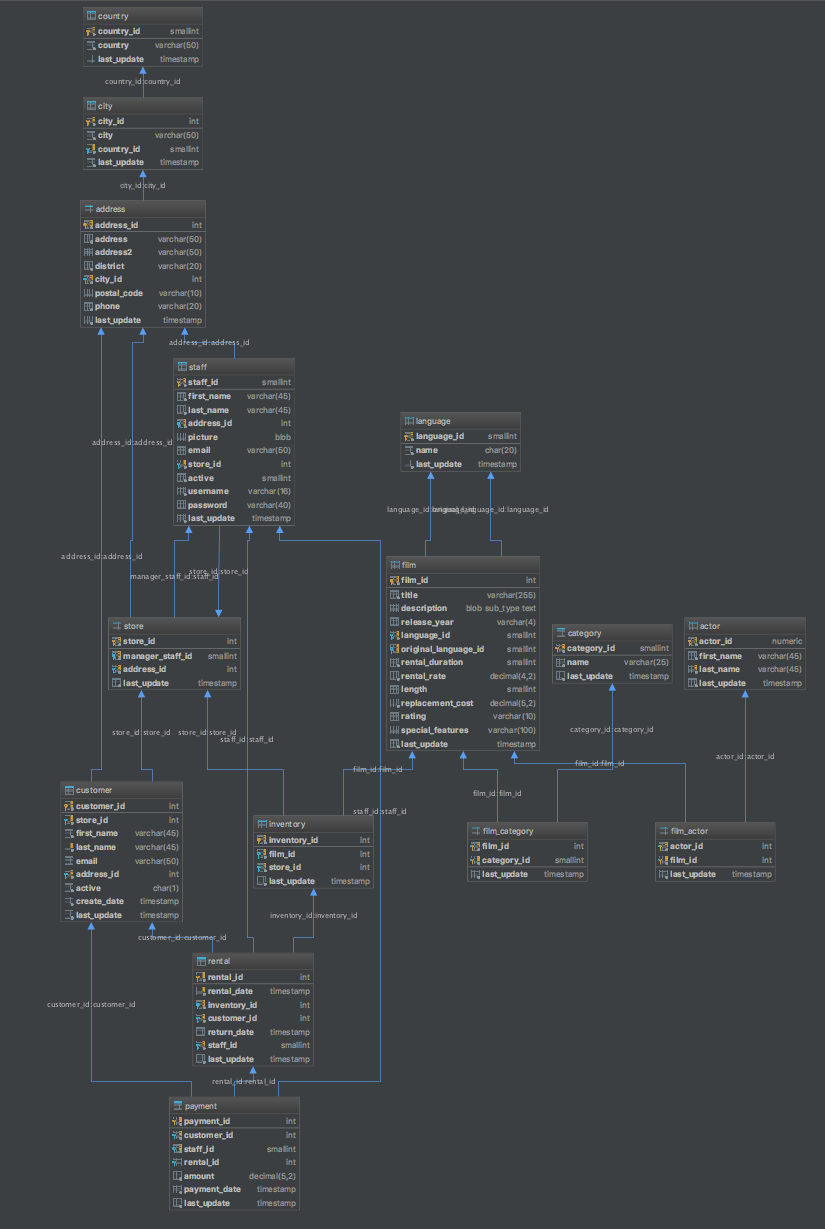

# My się zajmiemy trochę mniejszym wycinkiem...
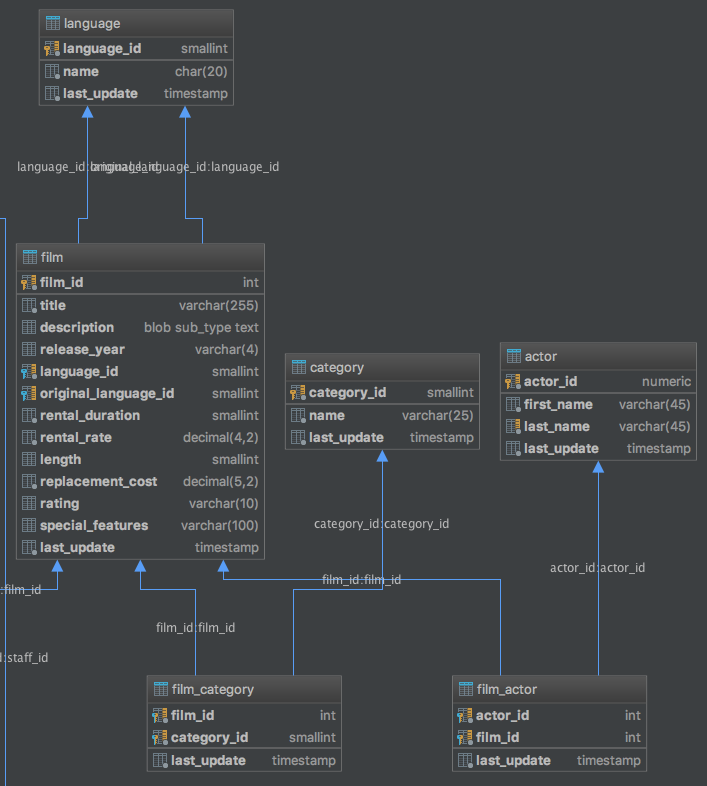

# Tabela
- w bazie danych obiekt, który zawiera dane
- tabela składa się z wierszy i kolumn
- każda kolumna reprezentuje jakąś właściwość
- każdy wiersz reprezentuje pojedynczy rekord

# Kolumna
- właściwość rekordu (np. imię, nazwisko, identyfikator itp.)

## Ma określony typ
- NULL
- INTEGER
- REAL
- TEXT
- BLOB

# NULL
- specjalny znacznik, który mówi o tym, że dana wartość nie jest ustawiona

# PK - Primary Key
- klucz główny dla tabeli
- unikalny
- posiada index
- maksymalnie jeden

# FK - Foreign Key
- klucz obcy
- wartość z pola z rekordu z innej tabeli, do którego "linkujemy"
- musi być jednoznaczne
- bardzo często PK innej tabeli

# Index
- zakłada się go na wybranej kolumnie (lub kilku)
- specjalna struktura danych, która umożliwia szybsze przeszukiwanie danych na podstawie danej kolumny
- w SQLite (i wielu innych bazach danych) zaimplementowane na B-drzewach https://pl.wikipedia.org/wiki/B-drzewo

więcej o indeksach w SQLicie: http://www.sqlitetutorial.net/sqlite-index/

# Relacje pomiędzy tabelami
- one-to-one
- one-to-many
- many-to-many

# sqlite3 w Pythonie

```python
import sqlite3
conn = sqlite3.connect('/path/to/database.db')
conn.close()
```

więcej https://docs.python.org/3/library/sqlite3.html#connection-objects

# Sakila
Przykładowa baza danych stworzona przez zespół odpowiedzialny za MySQL

https://dev.mysql.com/doc/sakila/en/sakila-introduction.html

Pobieramy to: https://github.com/jOOQ/jOOQ/raw/master/jOOQ-examples/Sakila/sqlite-sakila-db/sqlite-sakila-schema.sql

I to: https://github.com/jOOQ/jOOQ/raw/master/jOOQ-examples/Sakila/sqlite-sakila-db/sqlite-sakila-insert-data.sql

a następnie wykonujemy:

In [ ]:
import sqlite3

conn = sqlite3.connect('/path/to/database.db')
c = conn.cursor()

with open('sqlite-sakila-schema.sql', 'r', encoding='utf-8') as create_file:
    create_query = create_file.read()
with open('sqlite-sakila-insert-data.sql', 'r', encoding='utf-8') as insert_file:
    insert_query = insert_file.read()

c.executescript(create_query)
c.executescript(insert_query)

conn.commit()
conn.close()

- Skrypt z insertami wolno działa? http://www.sqlite.org/faq.html#q19
- Rozwiązanie: http://www.sqlite.org/lang_transaction.html


- bez BEGIN .. COMMIT - 2h10min
- z BEGIN .. COMMIT - kilkanaście sekund

- tworzymy obiekt __Cursor__, który umożliwia nam wykonywanie poleceń na bazie
- możemy na nim wykonywać operacje za pomocą metod __execute__ (jedna operacja), __executemany__ (jeden rodzaj operacji z wieloma różnymi parametrami) lub __executescript__ (ciąg operacji)

więcej: https://docs.python.org/3/library/sqlite3.html#cursor-objects

Tego możemy używać do przeglądania naszej bazy danych: http://sqlitebrowser.org/

# Dlaczego będziemy odpalać gołe SQL-ki?
- znajomość SQL jest kluczowa w pracy programisty
- ORM nie zawsze jest w stanie załatwić skomplikowane przypadku
- dobrze jest wiedzieć co się dzieje "pod spodem" ORMa
- znajomość SQLa ułatwia debugowanie problemów związanych z bazami danych

# Dostęp do bazy danych w aplikacji we Flasku

Połączenie do bazy danych tworzymy i trzymamy kontekście aplikacji, zamykamy połączenie przy niszczeniu kontekstu.

In [ ]:
# http://flask.pocoo.org/docs/0.12/patterns/sqlite3/
import sqlite3
from flask import g

DATABASE = '/path/to/database.db'

def get_db():
    db = getattr(g, '_database', None)
    if db is None:
        db = g._database = sqlite3.connect(DATABASE)
    return db

@app.teardown_appcontext
def close_connection(exception):
    db = getattr(g, '_database', None)
    if db is not None:
        db.close()

# SELECT

Pobieranie konkretnych pól z wybranej tabeli:
```sql
SELECT {lista_pól} FROM {nazwa_tabeli};
```

np.

```sql
SELECT first_name, last_name FROM actor;
```

Pobieranie wszystkich pól z wybranej tabeli:
```sql
SELECT * FROM {nazwa_tabeli};
```

np.

```sql
SELECT * FROM actor;
```

## Przykład 1
Stworzyć widok listy tytułów filmów `/films`, z wykorzystaniem szablonu:
```html
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Films</title>
</head>
<body>
  <ul>
    Nazwa
    {% for film in films %}
      <li>{{ film[0] }}</li>
    {% endfor %}
  </ul>
</body>
</html>
```

Wszystkie przykłady są zdeployowane tu: https://python-level-up-2018-sqlite.herokuapp.com/

In [ ]:
@app.route('/films')
def films_list():
    db = get_db()
    cursor = db.cursor()
    data = cursor.execute('SELECT title FROM film').fetchall()
    cursor.close()
    return render_template('films.html', films=data)

# Pobieranie wyników zapytań
- __fetchall__ - zwraca listę wyników 
- __fetchone__ - zwraca jeden (następny) wynik, jeżeli nie ma to `None`
- __fetchmany__(size=cursor.arraysize) - zwraca listę max `size` wyników, w przypadku braku wyników pusta lista


- domyślny cursor.arraysize to 1

# Typy w wyniku
- domyślnie wiersz przedstawiony jest jako `tuple` wartości poszczególnych kolumn
- kolumny "zachowują" swój typ z bazy danych zgodnie z tabelą https://docs.python.org/3/library/sqlite3.html#sqlite-and-python-types

Do wyników możemy dostać się też w wygodniejszy sposób, wykorzystując nazwy kolumn

ustawiamy na połączeniu `row_factory`
```python
db.row_factory = sqlite3.Row
```

Dzięki temu do tytułu filmu możemy dostać się za pomocą `film['title']` zamiast `film[0]`

Możliwe jest też zdefiniowanie własnych `row_factory` https://docs.python.org/3/library/sqlite3.html#sqlite3.Connection.row_factory

Możemy też skorzystać ze "skrótu" - odpalić `execute` od razu na `Connection`, bez tworzenia wprost obiektu `Cursora`

```python
@app.route('/films')
def films_list():
    db = get_db()
    data = db.execute('SELECT title FROM film').fetchall()
    return render_template('films.html', films=data)
```

# SELECT ... WHERE

Filtrowanie :
```sql
SELECT {lista_pól} FROM {nazwa_tabeli} WHERE {warunek};
```

np.

```sql
SELECT first_name, last_name FROM actor WHERE id = 1;
```

więcej: http://www.sqlitetutorial.net/sqlite-where/

## Przykład 2
Stworzyć widok listy tytułów filmów `/films/<int:film_id>`, z wykorzystaniem szablonu:
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Films</title>
</head>
<body>
    <h1>{{ film['title'] }}</h1>
    <h2>Rok produkcji: {{ film['release_year'] }}</h2>
    <h3>Opis: {{ film['description'] }}</h3>
</body>
</html>
```

In [ ]:
@app.route('/films/<int:film_id>')
def single_film(film_id):
    db = get_db()
    data = db.execute(
        'SELECT title, release_year, description FROM film WHERE film_id = ?',
        (film_id,)).fetchone()
    return render_template('single_film.html', film=data)

# Wstawianie zmiennych do zapytania
- znaki zapytania to placeholdery, pod które są podstawiane wartości z tupli przekazanej jako drugi argument
- `?` placeholder "pozycyjny" - pod kolejne znaki zapytania podstawiane są kolejne wartości z tupli
- `:nazwa` to "keyword" placeholder, jako drugi argument to `execute` przekazujemy słownik; dane są podstawiane na podstawie kluczy ze słownika

```python
@app.route('/films/<int:film_id>')
def single_film(film_id):
    db = get_db()
    data = db.execute(
        'SELECT title, release_year, description FROM film WHERE film_id = :film_id',
        {'film_id': film_id}).fetchone()
    return render_template('single_film.html', film=data)
```

# JOIN
Łączenie tabel ze sobą :
```sql
SELECT {lista_pól} FROM {nazwa_tabeli}
JOIN {nazwa_innej_tabeli} ON {warunek_joina}
(opcjonalnie) WHERE {warunek};
```

np.

```sql
SELECT actor.last_name, film.title FROM actor
JOIN film_actor ON actor.actor_id = film_actor.actor_id
JOIN film ON film_actor.film_id = film.film_id;
```

Istnieją różne typy JOINów: https://stackoverflow.com/questions/17946221/sql-join-and-different-types-of-joins

## Przykład 3
Dodaj widok listy filmów rozszerzony o kategorię - `/films_with_category`. Szablon:
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Films</title>
</head>
<body>
  <ul>
      Nazwa, Kategoria
  {% for film in films %}
      <li>{{ film['title'] }} {{ film['name'] }}</li>
  {% endfor %}
  </ul>
</body>
</html>
```

In [ ]:
@app.route('/films_with_category')
def films_with_category_list():
    db = get_db()
    data = db.execute('''
    SELECT title, name from film
    JOIN film_category ON film.film_id = film_category.film_id
    JOIN category ON film_category.category_id = category.category_id;
    ''').fetchall()
    return render_template('films_with_category.html', films=data)

# LIMIT, OFFSET, ORDER BY 
Pobranie rekordów w określonej kolejności
```sql
SELECT {lista_pól} FROM {nazwa_tabeli} ORDER BY {nazwa_pola};
```
Np.

```sql
SELECT * FROM actor ORDER BY last_name;
```
Pobranie ograniczonej liczby rekordów
```sql
SELECT {lista_pól} FROM {nazwa_tabeli} LIMIT {liczba_rekordów};
```
Np.
```sql
SELECT * FROM actor LIMIT 10;
```
Pobranie ograniczonej liczby rekordów z pominięciem pierwszych
```sql
SELECT {lista_pól} FROM {nazwa_tabeli} LIMIT {liczba_rekordów} OFFSET {liczba_pominiętych_rekordów};
```
Np.
```sql
SELECT * FROM actor LIMIT 10 OFFSET 20;
```

http://www.sqlitetutorial.net/sqlite-limit/

## Przykład 4
Dodaj widok listy filmów z kategorią, w którym filmy posortowane są po nazwie kategorii - `/films_with_category_order`.

Szablon taki sam jak w __Przykładzie 3__

In [ ]:
@app.route('/films_with_category_order')
def films_with_category_order_list():
    db = get_db()
    data = db.execute('''
    SELECT title, name from film
    JOIN film_category ON film.film_id = film_category.film_id
    JOIN category ON film_category.category_id = category.category_id
    order by category.name;
    ''').fetchall()
    return render_template('films_with_category.html', films=data)

# INSERT

Wstawienie wiersza do tabeli
```sql
INSERT INTO {nazwa_tabeli} ({lista_pól) VALUES ({lista_wartości});
```

## Przykład 5
Stwórz widok dodawania nowego aktora `/actors/add` oraz widok listy aktorów `/actors`.

Wykorzystaj szablony:
```html
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Aktorzy</title>
</head>
<body>
  <ul>
    Imię i nazwisko
    {% for actor in actors %}
      <li>{{ actor['first_name'] + ' ' + actor['last_name'] }}</li>
    {% endfor %}
  </ul>
</body>
</html>
```

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Dodaj aktora</title>
</head>
<body>
<form action="/actors/add", method="post">
  Imię:<br>
  <input type="text" name="first_name"><br>
  Nazwisko:<br>
  <input type="text" name="last_name"><br><br>
  <input type="submit" value="Dodaj">
</form>
</body>
</html>
```

# CSRF
- Uwaga! Nasz formularz nie jest zabezpieczony zgodnie z najlepszymi praktykami
- Korzystając z HTML-owych formularzy powinniśmy zabezpieczać się przed atakiem CSRF https://www.owasp.org/index.php/Cross-Site_Request_Forgery_(CSRF)
### Jak to robić we Flasku?
- Pisząc to samemu: http://flask.pocoo.org/snippets/3/
- Lub najlepiej skorzystać z gotowego rozwiązania: http://flask-wtf.readthedocs.io/en/stable/csrf.html

In [ ]:
@app.route('/actors/add', methods=['GET', 'POST'])
def add_actor_version_1():
    if request.method == 'POST':
        first_name = request.form['first_name']
        last_name = request.form['last_name']
        db = get_db()
        db.executescript(
            'INSERT INTO actor (first_name, last_name) VALUES ("{}", "{}")'
            .format(first_name, last_name)
        )
        db.commit()
        return redirect(url_for('actors_list'))
    else:
        return render_template('add_actor.html')

## Co z tym kodem jest nie tak?

# SQL Injection

![xkcd SQL Injection comic](https://imgs.xkcd.com/comics/exploits_of_a_mom.png )

Źródło: https://imgs.xkcd.com/comics/exploits_of_a_mom.png

https://xkcd.com/327/

In [ ]:
@app.route('/actors/add', methods=['GET', 'POST'])
def add_actor_version_2():
    if request.method == 'POST':
        first_name = request.form['first_name']
        last_name = request.form['last_name']
        db = get_db()
        db.execute(
            'INSERT INTO actor (first_name, last_name) VALUES (?, ?)',
            (first_name, last_name)
        )
        db.commit()
        return redirect(url_for('actors_list'))
    else:
        return render_template('add_actor.html')

# UPDATE
Aktualizacja wszystkich wierszy z tabeli
```sql
UPDATE {nazwa_tabeli} SET {nazwa_pola} = {wartość_pola}; 
```

Aktualizacja wybranych wierszy
```sql
UPDATE {nazwa_tabeli} SET {nazwa_pola} = {wartość_pola} WHERE {warunek}
```

## Przykład 6
Dodaj widok edycji aktora `/actors/edit/<int:actor_id>`. Szablon:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Dodaj aktora</title>
</head>
<body>
<form action="/actors/add", method="post">
  Imię:<br>
  <input type="text" name="first_name"><br>
  Nazwisko:<br>
  <input type="text" name="last_name"><br><br>
  <input type="submit" value="Dodaj">
</form>
</body>
</html>
```

In [ ]:
@app.route('/actors/edit/<int:actor_id>', methods=['GET', 'POST'])
def edit_actor(actor_id):
    if request.method == 'POST':
        first_name = request.form['first_name']
        last_name = request.form['last_name']
        db = get_db()
        db.execute(
            'UPDATE actor SET first_name = ?, last_name = ? WHERE actor_id = ?',
            (first_name, last_name, actor_id)
        )
        db.commit()
        return redirect(url_for('actors_list'))
    else:
        db = get_db()
        actor = db.execute(
            'SELECT first_name, last_name from actor WHERE actor_id = ?',
            (actor_id,)).fetchone()
        return render_template('edit_actor.html', actor=actor, actor_id=actor_id)

# DELETE
Usunięcie wszystkiego z tabeli
```sql
DELETE FROM {nazwa_tabeli};
```

Usunięcie wybranych wierszy
```sql
DELETE FROM {nazwa_tabeli} WHERE {warunek};
```

## Przykład 7
Dodaj możliwość usunięcia wybranego aktora `/actors/delete/<int:actor_id`. Szablon: 

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Usuń aktora</title>
</head>
<body>
  Imię: {{ actor['first_name'] }}<br>
  Nazwisko: {{ actor['last_name'] }}<br>
  
<form action="/actors/delete/{{ actor_id }}" method="post">
    <input type="submit" value="Usuń">
</form>
</body>
</html>
```

In [ ]:
@app.route('/actors/delete/<int:actor_id>', methods=['GET', 'POST'])
def delete_actor(actor_id):
    if request.method == 'POST':
        db = get_db()
        db.execute('DELETE FROM actor WHERE actor_id = ?', (actor_id,))
        db.commit()
        return redirect(url_for('actors_list'))
    else:
        db = get_db()
        actor = db.execute(
            'SELECT first_name, last_name from actor WHERE actor_id = ?',
            (actor_id,)).fetchone()
        return render_template('delete_actor.html', actor=actor, actor_id=actor_id)

# Funkcje agregujące
- MIN
- MAX
- SUM
- AVG
- COUNT
- COUNT(*)

Uruchomienie funkcji agregującej dla wybranej kolumny
```sql
SELECT {funkcja_agregująca}({kolumna}) FROM {tabela};
```
Np.
```sql
SELECT MIN(actor_id) FROM actor;
```

Zliczenie wszystkich wierszy w tabeli
```sql
SELECT COUNT(*) FROM {tabela};
```
Np.
```sql
SELECT COUNT(*) FROM actor;
```

## Przykład 8
Dodaj podsumowanie liczby aktorów na widoku listy aktorów. Szablon: 

```html
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Aktorzy</title>
</head>
<body>
  LICZBA AKTORÓW: {{ count }}
  <ul>
    Imię i nazwisko
    {% for actor in actors %}
      <li>{{ actor['first_name'] + ' ' + actor['last_name'] }}</li>
    {% endfor %}
  </ul>
</body>
</html>
```

In [ ]:
@app.route('/actors_count')
def actors_list_with_count():
    db = get_db()
    data = db.execute('SELECT first_name, last_name FROM actor ORDER BY last_update DESC').fetchall()
    count = db.execute('SELECT COUNT(*) FROM actor').fetchone()
    return render_template('actors_count.html', actors=data, count=count[0])

# Porównanie wydajności SQL-owego AVG z obliczeniami w Pythonie

In [ ]:
import timeit

result_sql = timeit.timeit(
    "c.execute('SELECT AVG(value) FROM test_table').fetchone()",
    setup="import sqlite3;conn = sqlite3.connect('test_single_table.db');c = conn.cursor();",
    number=1
)
print(result_sql)

result_python = timeit.timeit(
    "result = c.execute('SELECT value FROM test_table').fetchall(); l = [r[0] for r in result]; sum(l) / len(l)",
    setup="import sqlite3;conn = sqlite3.connect('test_single_table.db');c = conn.cursor();",
    number=1
)
print(result_python)

Wynik:
```
0.073508342000423
0.7799752800056012
```

# Deploy na Heroku
- __SQLite__ na __Heroku__? Nie jest to najlepszy pomysł https://devcenter.heroku.com/articles/sqlite3
- Wystarczy wypushować dodatkowo plik z bazą danych na Heroku
- Problem: Wprowadzane w nim zmiany będą wymazywane, przynajmniej raz na 24h - po każdym deployu, restarcie i co około 24h z powodu tego , jak Heroku zarządza swoimi `dynos`
- Co z tym robimy? Na tych zajęciach nic
- Dobre rozwiązanie? Korzystanie z __Heroku Postgres__ https://elements.heroku.com/addons/heroku-postgresql zamiast z __sqlite__

# CREATE TABLE
Tworzenie tabeli
```sql
CREATE TABLE {nazwa_tabeli} {lista_pól}
```

Np.

```sql
CREATE TABLE actor (
  actor_id numeric NOT NULL ,
  first_name VARCHAR(45) NOT NULL,
  last_name VARCHAR(45) NOT NULL,
  last_update TIMESTAMP NOT NULL,
  PRIMARY KEY  (actor_id)
);
```

https://www.sqlite.org/lang_createtable.html

# CREATE INDEX
Tworzenie indeksu
```sql
CREATE  INDEX {nazwa_indeksu} ON {nazwa_tabeli}({nazwa_pola});
```
Np.
```sql
CREATE  INDEX idx_actor_last_name ON actor(last_name);
```

https://www.sqlite.org/lang_createindex.html

# ALTER TABLE

Wprowadzenie zmian w istniejącej tabeli. Np. dodawanie nowej kolumny.

Usunięcie tabeli
```sql
ALTER TABLE {nazwa_tabeli} {zmiana};
```
np.
```sql
ALTER TABLE actor ADD COLUMN middle_name VARCHAR(45);
```

https://www.sqlite.org/lang_altertable.html

# DROP TABLE

Usunięcie tabeli
```sql
DROP TABLE {nazwa_tabeli};
```

np.
```sql
DROP TABLE actor;
```

https://www.sqlite.org/lang_droptable.html

# KONIEC